In [1]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import statistics
import plotly
import plotly.express as px
import plotly.graph_objs as go
import visualisation
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kneed
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# transcriptomics, n=65

In [3]:
%store -r data
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
cell_line,,,,,,,,,,,,,,,,,,,,,
COV434_OVARY,2.946731,0.275007,6.527321,1.761285,3.160275,0.000000,5.204376,0.464668,3.044394,3.435629,...,0.411426,0.0,0.028569,0.014355,0.042644,0.757023,1.925999,0.000000,0.0,0.000000
59M_OVARY,3.460743,0.000000,6.399000,1.855990,3.374344,0.028569,3.261531,6.094869,5.290203,3.947666,...,0.028569,0.0,0.137504,0.000000,0.056584,0.978196,3.116032,0.000000,0.0,0.137504
NZOV9_OVARY,6.017922,0.000000,6.544578,3.047887,4.425594,0.000000,0.000000,4.412104,5.500165,4.053111,...,0.000000,0.0,0.739848,0.028569,0.056584,0.275007,2.443607,0.000000,0.0,0.000000
OAW42_OVARY,4.318317,0.000000,7.045377,1.831877,4.016140,0.014355,0.042644,6.321567,3.739848,4.559492,...,0.000000,0.0,0.056584,0.000000,0.000000,0.150560,2.929791,0.028569,0.0,0.000000
COV644_OVARY,4.152995,0.000000,6.044394,2.104337,3.852998,0.201634,0.773996,6.676662,3.993674,4.136684,...,0.000000,0.0,0.124328,0.056584,0.111031,0.443607,4.688740,0.757023,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RMUGS_OVARY,4.426265,0.000000,5.912650,2.114367,4.017031,0.000000,1.594549,5.535742,6.410748,3.005400,...,0.000000,0.0,0.028569,0.000000,0.150560,0.831877,4.978196,0.028569,0.0,0.070389
HEYA8_OVARY,3.718088,0.000000,7.133810,1.922198,3.787641,0.000000,0.475085,6.115824,4.336997,2.946731,...,0.000000,0.0,0.855990,0.014355,0.042644,0.575312,4.095924,0.000000,0.0,0.000000
PEO4_OVARY,4.288359,0.000000,6.011451,1.111031,2.735522,0.000000,1.704872,5.599913,2.773996,2.553361,...,0.000000,0.0,0.056584,0.000000,0.000000,0.097611,4.644433,0.000000,0.0,0.000000


In [27]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[ -11.44917459,  -73.37968292],
       [  40.38181324,  -31.72094431],
       [  22.6278675 ,  -51.73576204],
       [  49.75716059,  -38.88690169],
       [  -5.95731999,   31.50608155],
       [  -8.10940044,   19.05990399],
       [  51.17808103,   36.90198178],
       [ -96.98430107,   24.31225981],
       [   0.58930108,  -49.66125876],
       [ -53.47366913,   21.05175327],
       [ -16.61933838,  -33.94320861],
       [ 140.14786563,   90.31444565],
       [   5.54937967,  -62.17650087],
       [ 110.1884888 ,   44.23432352],
       [ -10.07207993,   -1.09074354],
       [ 102.09238063,   12.24546844],
       [ -20.67940693,  -57.91092685],
       [ -29.09618701,  -26.55307759],
       [ -59.78950955,  -83.50440791],
       [  -9.68429059,   39.97806901],
       [  46.18566132,  -69.92648556],
       [ -63.99543514,   -8.80276309],
       [ -45.09225016,   -6.11229453],
       [   1.71824019,    4.3174482 ],
       [  56.38333786,  -46.54362565],
       [   7.52764151,   

Optimal number of clusters 5


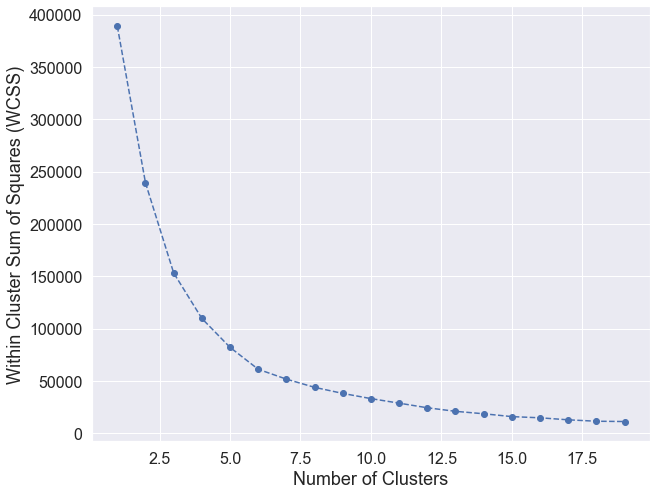

In [28]:
wcss = []
max_clusters = 20
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.33780812967939916


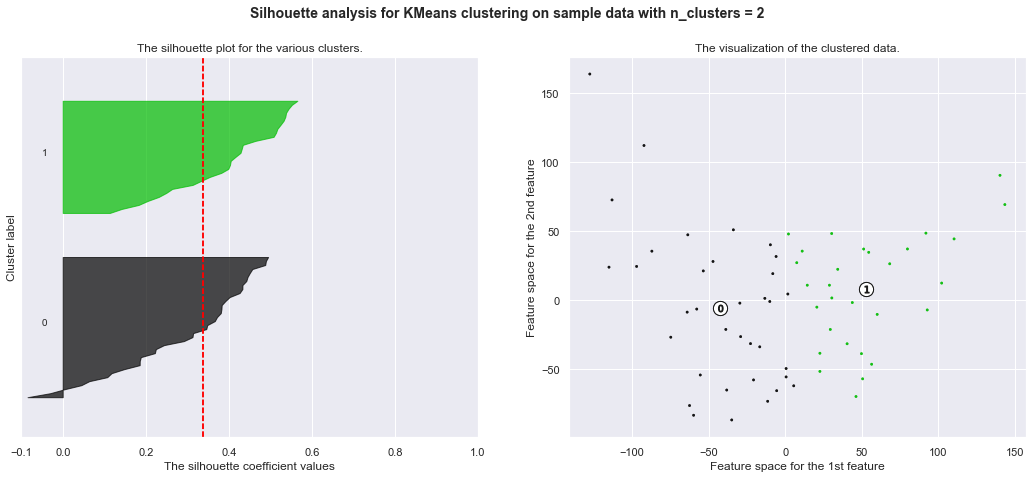

For n_clusters = 3 The average silhouette_score is : 0.3742328242720638


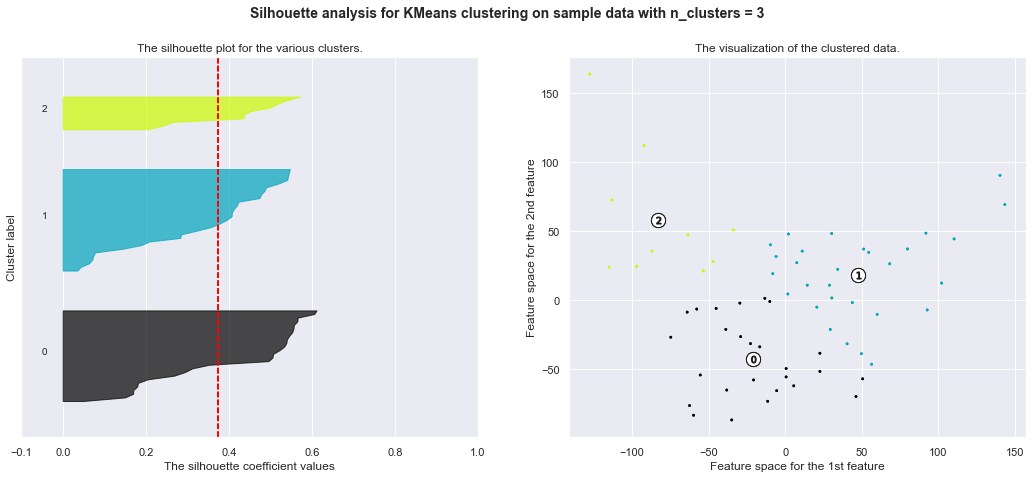

For n_clusters = 4 The average silhouette_score is : 0.364156089929455


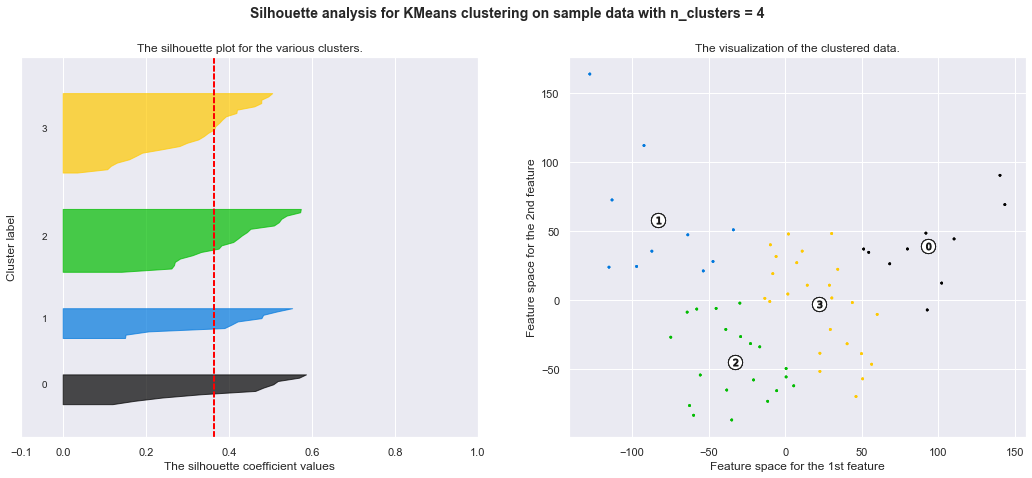

For n_clusters = 5 The average silhouette_score is : 0.37809323248691845


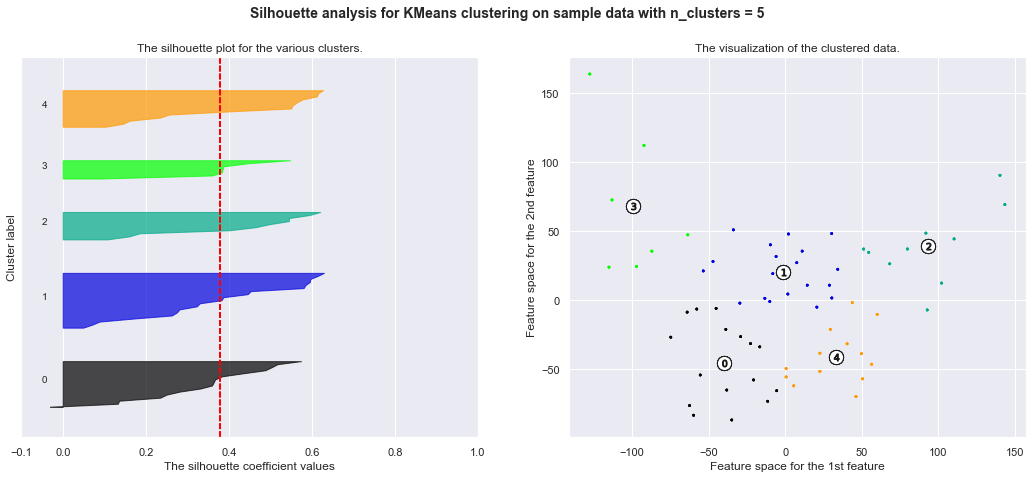

For n_clusters = 6 The average silhouette_score is : 0.39371451884678055


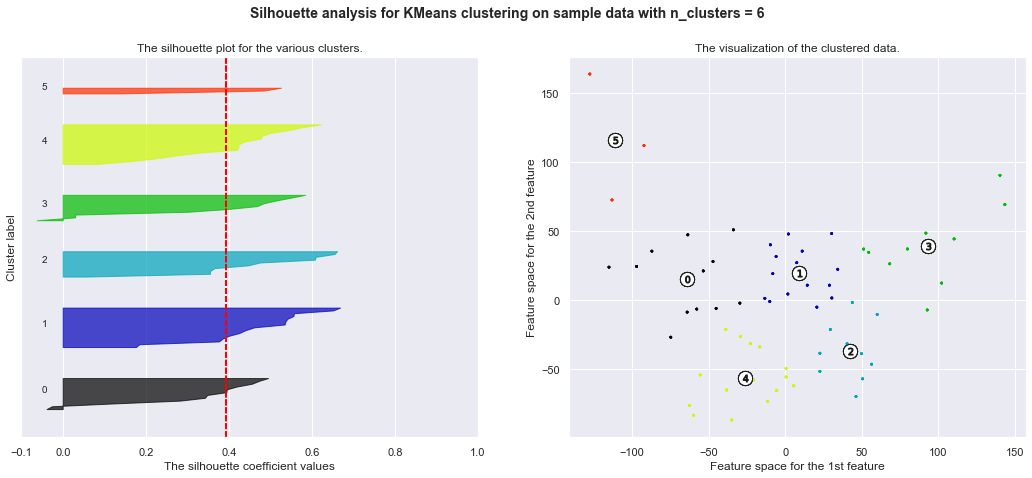

For n_clusters = 7 The average silhouette_score is : 0.39753264444417047


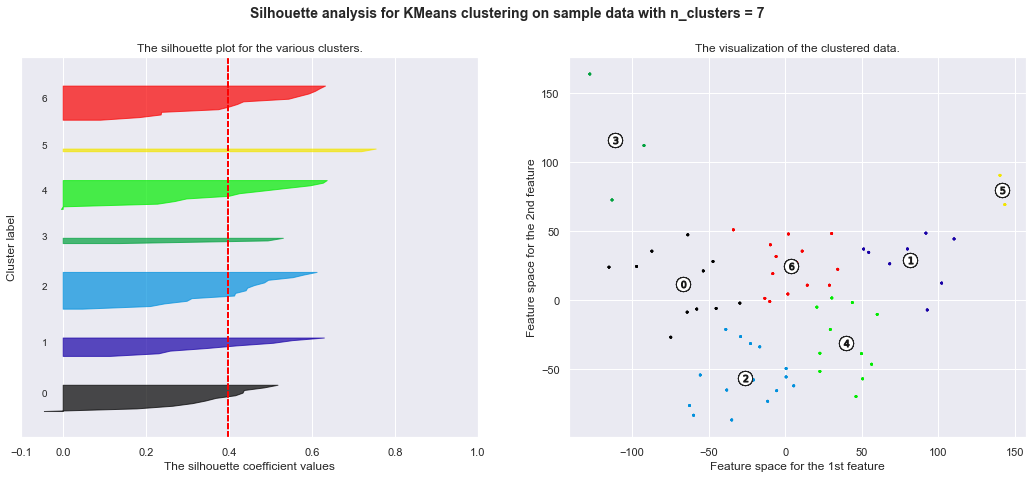

For n_clusters = 8 The average silhouette_score is : 0.3704222316605922


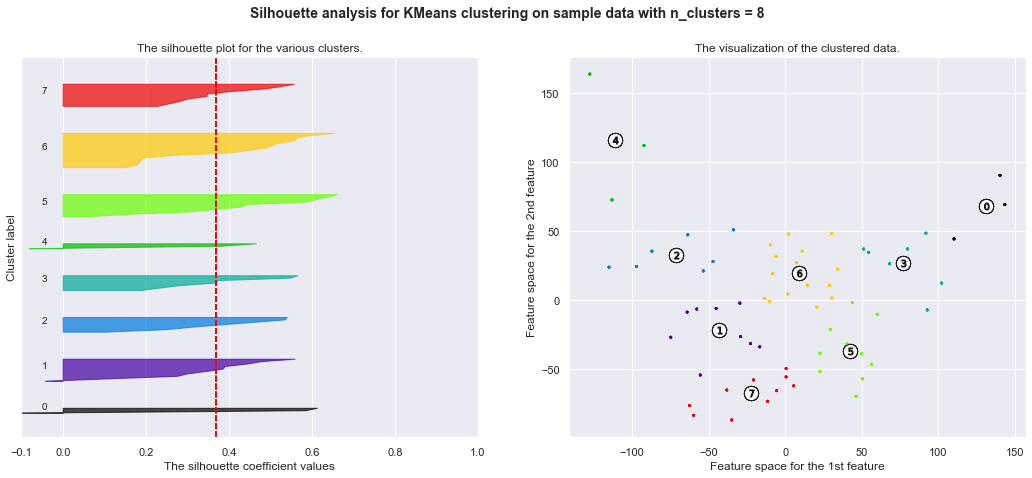

For n_clusters = 9 The average silhouette_score is : 0.37254070001159173


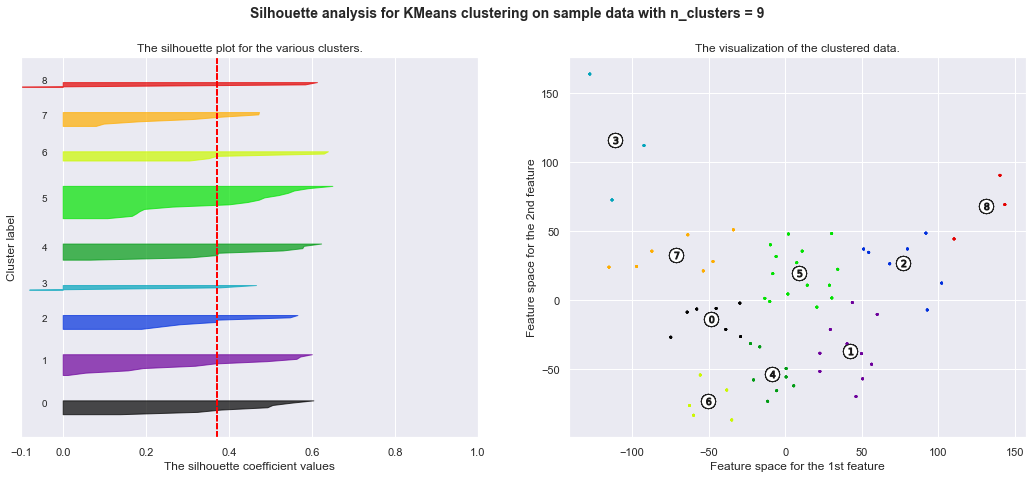

For n_clusters = 10 The average silhouette_score is : 0.3452835680416799


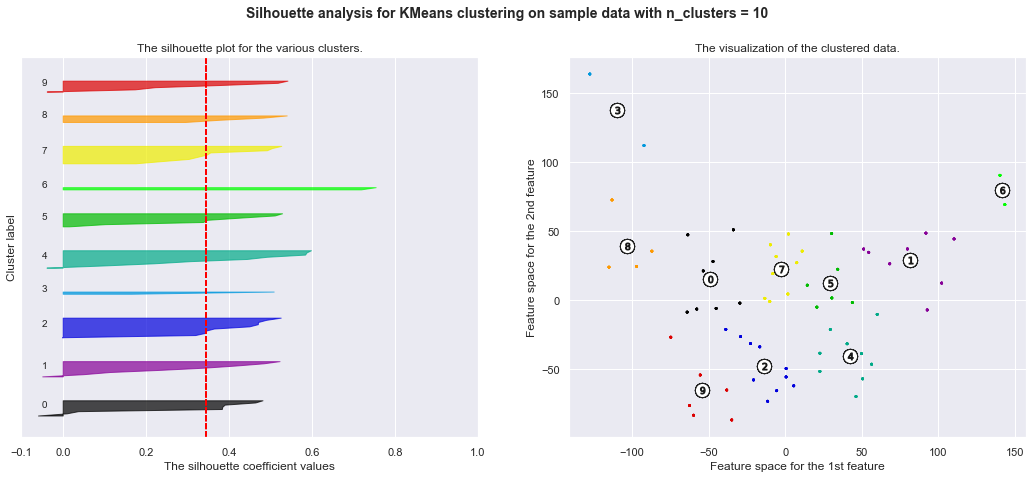

For n_clusters = 11 The average silhouette_score is : 0.3509919735686244


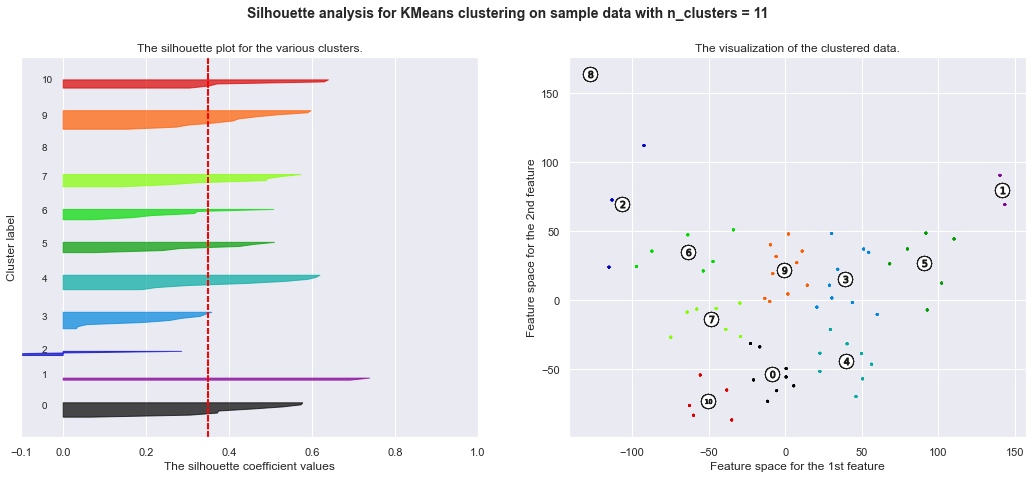

For n_clusters = 12 The average silhouette_score is : 0.36971858061918544


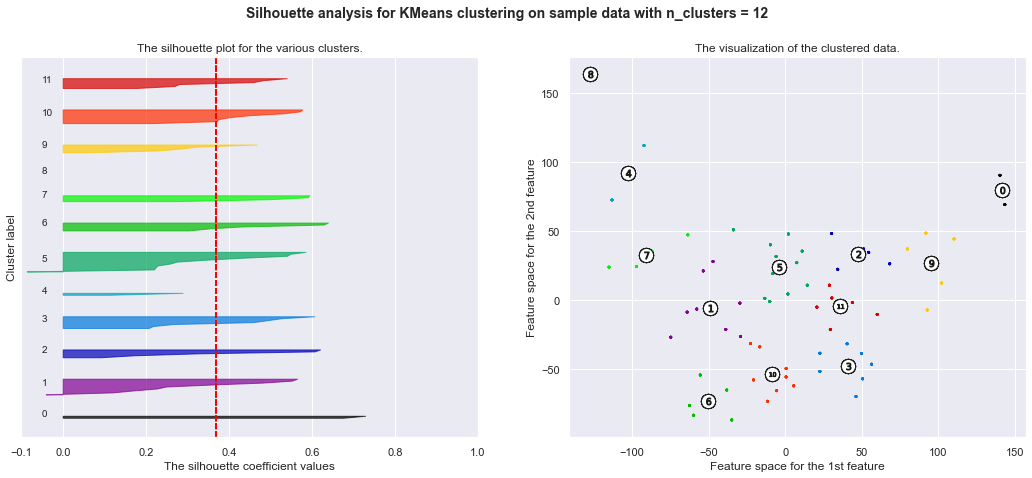

For n_clusters = 13 The average silhouette_score is : 0.3545113909969744


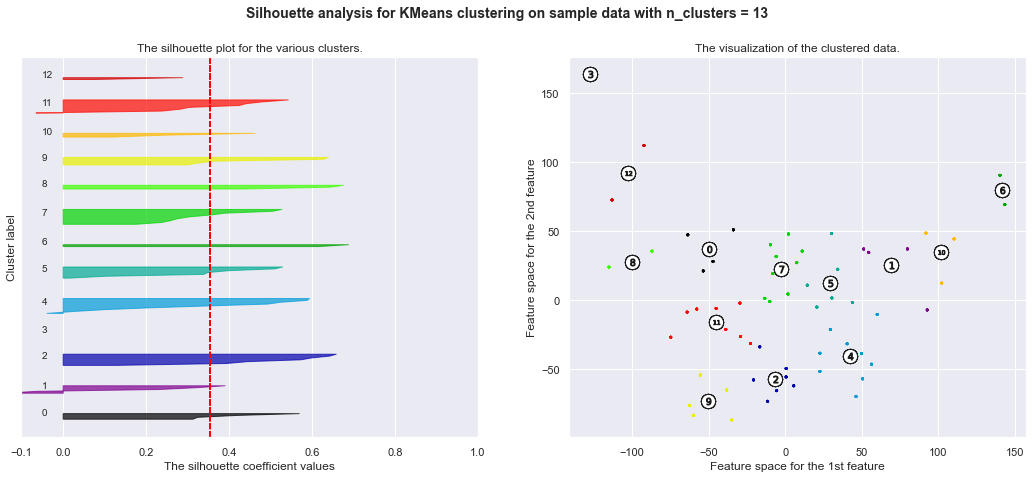

For n_clusters = 14 The average silhouette_score is : 0.37565124658038407


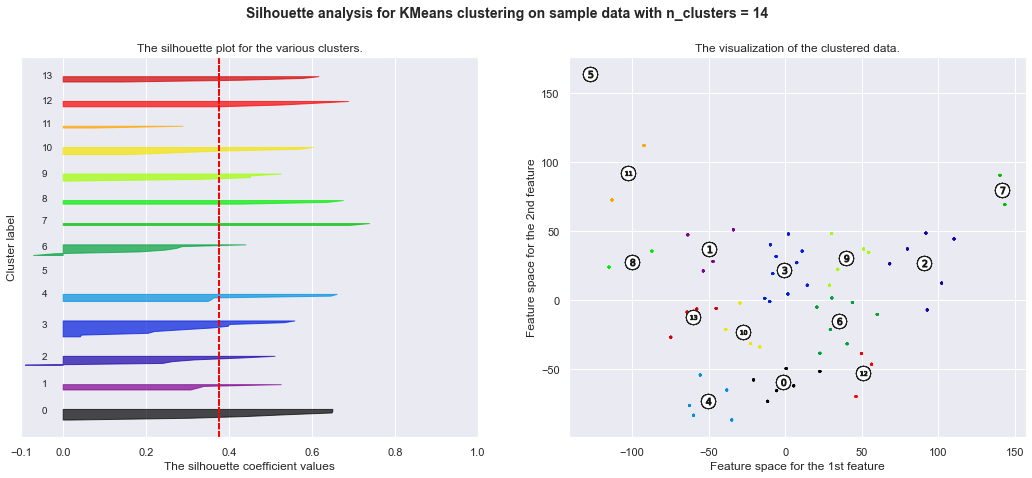

For n_clusters = 15 The average silhouette_score is : 0.4123647890710194


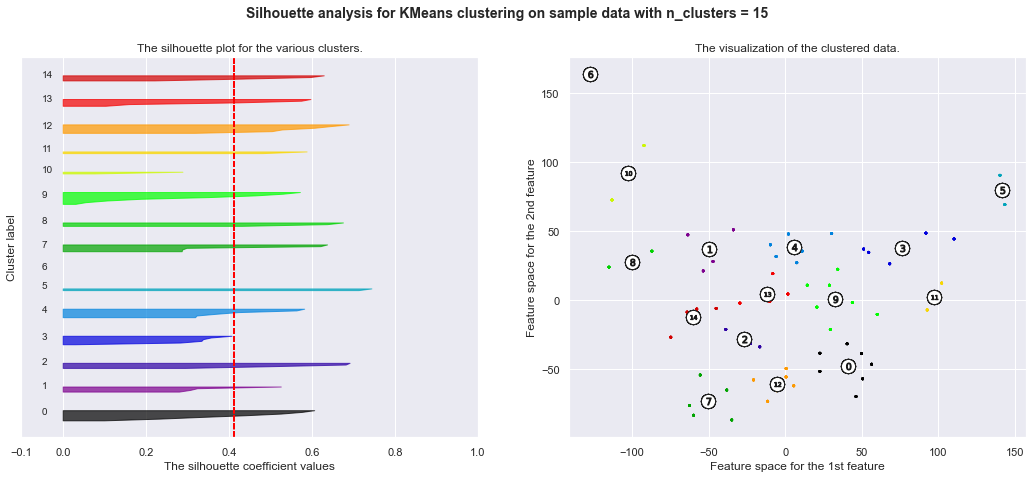

For n_clusters = 16 The average silhouette_score is : 0.39597516579698755


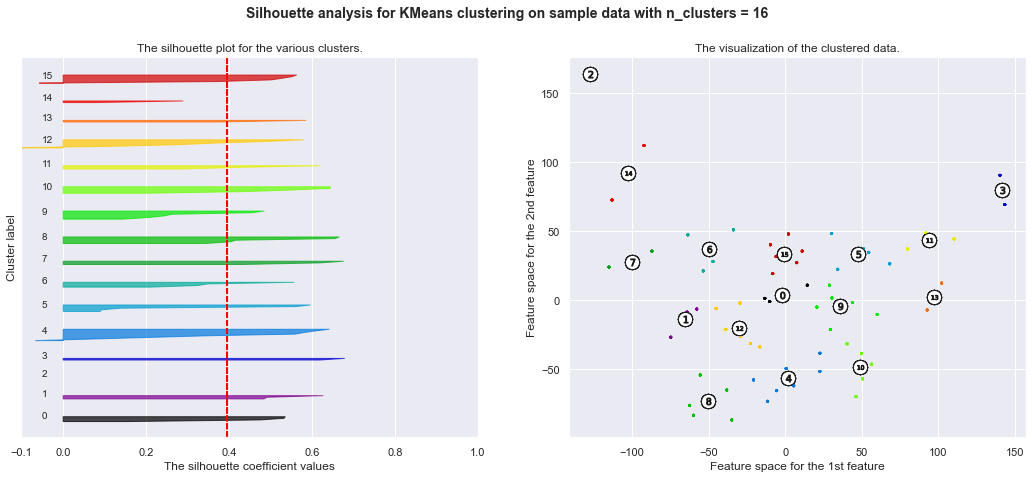

For n_clusters = 17 The average silhouette_score is : 0.4073029467759843


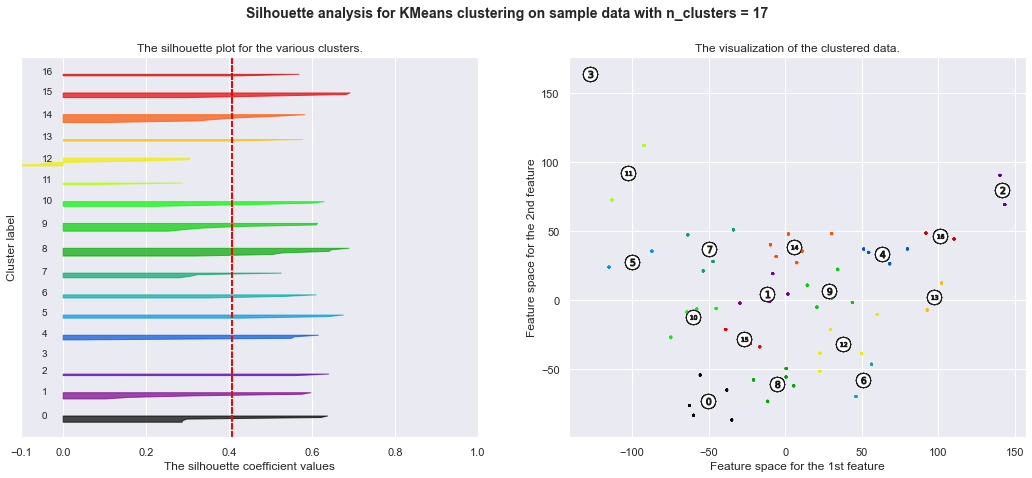

For n_clusters = 18 The average silhouette_score is : 0.4031596400108328


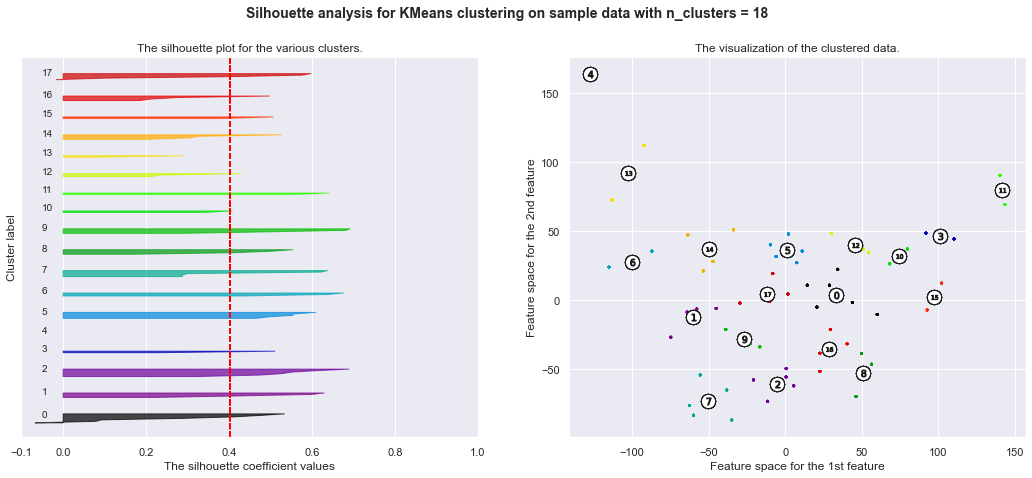

For n_clusters = 19 The average silhouette_score is : 0.3701544095690251


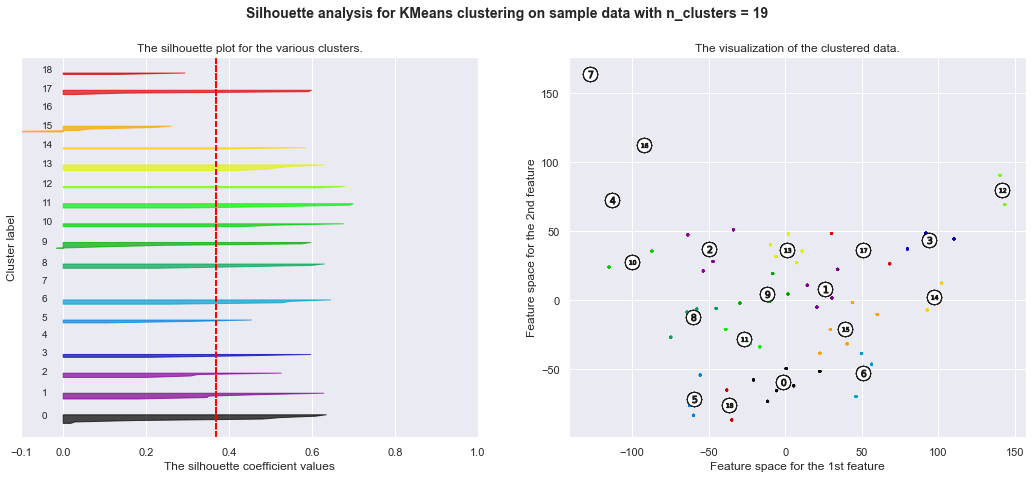

For n_clusters = 20 The average silhouette_score is : 0.38663326882728505


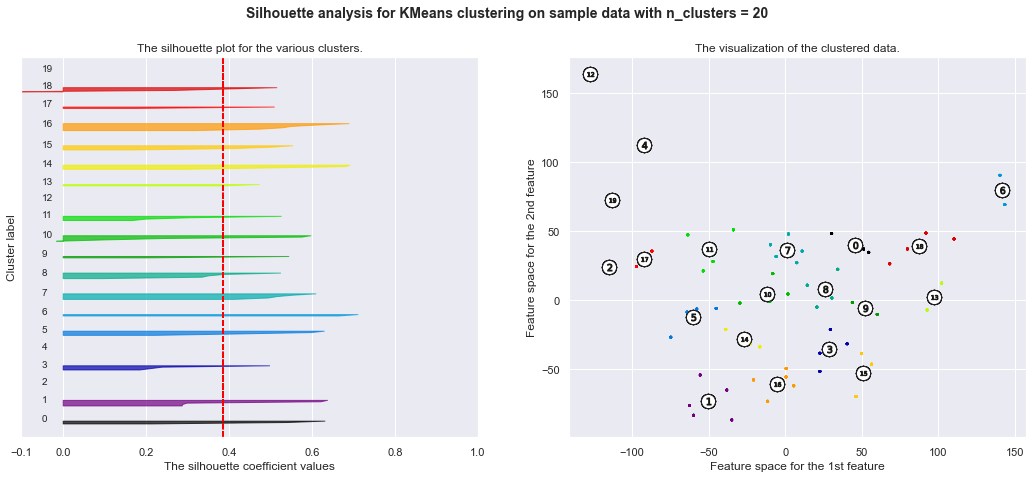

In [29]:
X_data = pca.transform(segmentation_std)
range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [33]:
data_t65 = data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_t65)
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[ -11.44981163,  -73.36354313],
       [  40.38159013,  -31.72636874],
       [  22.63066078,  -51.67370593],
       [  49.75699534,  -38.88453731],
       [  -5.95138967,   31.62684334],
       [  -8.11084914,   19.04330481],
       [  51.17873332,   36.90203516],
       [ -96.98993889,   24.1783928 ],
       [   0.58860522,  -49.65685146],
       [ -53.47459756,   21.02120626],
       [ -16.61979166,  -33.944008  ],
       [ 140.14691291,   90.32553765],
       [   5.54918336,  -62.15107392],
       [ 110.18792941,   44.19154035],
       [ -10.07186996,   -1.12217358],
       [ 102.09047634,   12.24886736],
       [ -20.68096129,  -57.91844054],
       [ -29.09532706,  -26.56495946],
       [ -59.79005934,  -83.50987034],
       [  -9.68195891,   39.99262474],
       [  46.18527697,  -69.9166497 ],
       [ -63.99483868,   -8.82229506],
       [ -45.09121079,   -6.12339381],
       [   1.71761298,    4.36061422],
       [  56.38293638,  -46.54834049],
       [   7.53063266,   

In [38]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
    score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=30)
    plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
    plt.xlabel('K')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic vs. K')
    plt.show()

In [43]:
t65_gap = optimalK(data_t65, nrefs=3, maxClusters=20)
t65_gap

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.appen

(19,
     clusterCount       gap
 0            1.0 -1.487249
 1            2.0 -1.427451
 2            3.0 -1.389952
 3            4.0 -1.355612
 4            5.0 -1.321470
 5            6.0 -1.313501
 6            7.0 -1.283673
 7            8.0 -1.270201
 8            9.0 -1.268281
 9           10.0 -1.259006
 10          11.0 -1.236893
 11          12.0 -1.225426
 12          13.0 -1.220641
 13          14.0 -1.205774
 14          15.0 -1.203330
 15          16.0 -1.175426
 16          17.0 -1.182103
 17          18.0 -1.165599
 18          19.0 -1.147139)

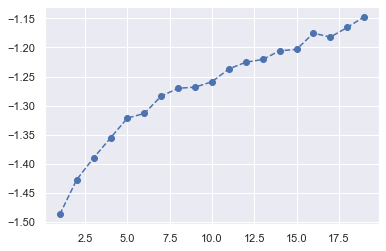

In [44]:
run_1_df = t65_gap[1]

clusterCount_1 = []
for count in run_1_df['clusterCount']:
    clusterCount_1.append(count)
    
gap_1 = []
for gap in run_1_df['gap']:
    gap_1.append(gap)
    
clusterCount_2 = clusterCount_1
gap_2 = gap_1

plt.plot(clusterCount_2, gap_2, linestyle='--', marker='o', color='b')

eval_env: 1


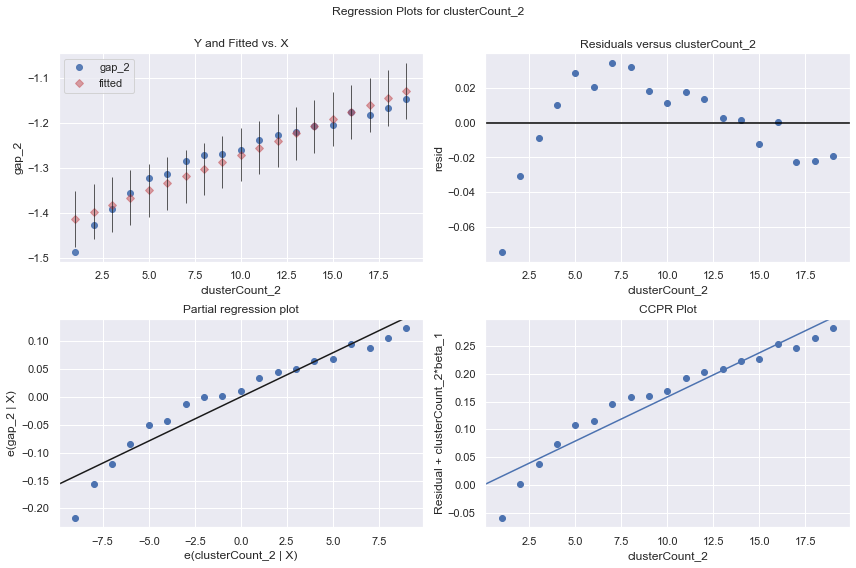

In [45]:
gap_stat_model_1 = ols('gap_2 ~ clusterCount_2', data=run_1_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'clusterCount_2', fig=gap_stat_fig_1)

In [52]:
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return(score)

In [61]:
scores = []
centers = []
for n in range(2,21):
    s = get_kmeans_score(data_t65, n)
    scores.append(s)
    centers.append(n)
print(scores)

[3.5319395525552535, 3.4099189425865712, 2.957046377536309, 2.95546753503898, 2.819694673088719, 2.5129068298608224, 2.429202790483692, 2.3841147629487103, 2.3298848669240284, 2.1883647866595815, 2.198457563144979, 1.947432854738491, 1.8689197707970444, 1.8799354444825187, 1.7324115176595902, 1.73481383852234, 1.6245164757800044, 1.648802250923183, 1.5835419268589486]


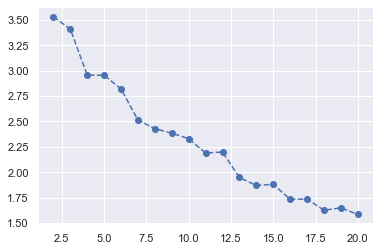

In [62]:
plt.plot(centers, scores, linestyle='--', marker='o', color='b')

eval_env: 1


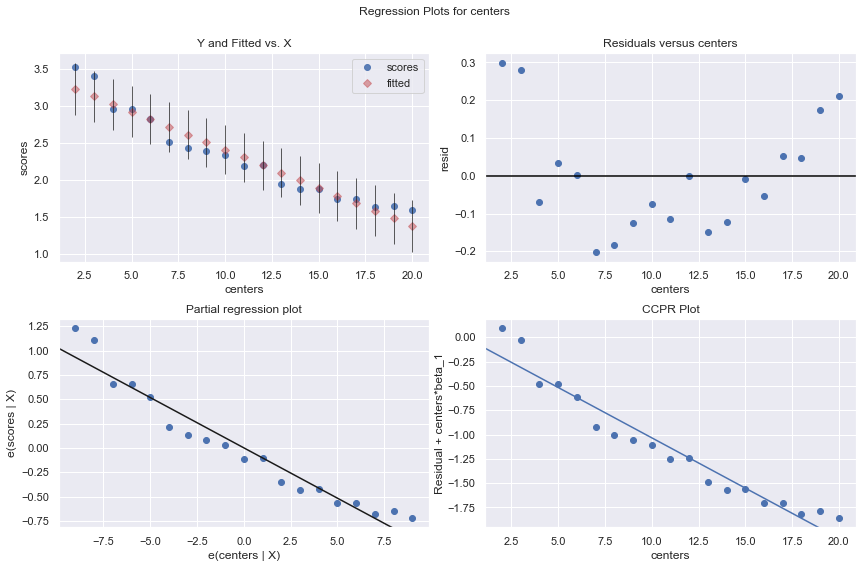

In [63]:
column_names = ['scores', 'centers']
res_df = pd.DataFrame(columns = column_names)
res_df['scores'] = scores
res_df['centers'] = centers
gap_stat_model_1 = ols('scores ~ centers', data=res_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'centers', fig=gap_stat_fig_1)

# proteomics, n=17

In [6]:
%store -r data_p
data_p

,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,SOGA1_HUMAN,NU133_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,FUBP1_HUMAN,MMP14_HUMAN,...,VEZF1_HUMAN,CAPZB_HUMAN.1,SP1_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,RM42_HUMAN
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.178261,-0.286144,-0.116591,-0.406977,-0.125347,0.382905,-0.420569,...,-0.113769,-0.095774,0.253674,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.381734,-0.104525,-0.183259,-0.205265,0.011734,0.153052,-1.182370,...,0.146127,0.631741,0.040602,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.518141,0.046955,0.587666,-0.243615,-0.502063,-0.118627,1.235853,...,-0.707460,0.547182,-0.505376,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,1.268040,-0.474546,-0.191642,0.325719,-0.332027,0.256438,-1.439273,...,-0.424909,-0.071308,0.168781,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.595932,0.151583,0.128698,-0.089561,-0.337770,0.243853,-1.172738,...,-0.267302,0.277996,0.392633,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,-0.554983,0.199323,-0.637933,0.490498,0.309166,0.918420,-1.923983,...,0.477351,0.086648,0.740052,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,-1.259058,0.633765,-0.000672,0.571120,0.234215,-0.354736,0.506709,...,1.267914,-0.465938,0.695508,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.319358,-0.490078,0.820523,0.276327,0.717663,1.026950,0.685141,...,-0.469486,0.388638,0.292705,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.067437,-0.209660,-0.047014,-0.126932,0.271636,0.112030,0.102325,...,0.061767,0.515933,-0.649939,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.926651


In [20]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_p)
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-13.67129892,   0.64887505],
       [ -3.80343329,  -2.38019133],
       [-37.300481  ,   0.59723814],
       [ -8.65875576,  -1.70973659],
       [ 18.40955447, -13.4304957 ],
       [  5.32000943,  62.26030851],
       [ 37.62724595,  -7.30651366],
       [-42.20869309,   2.54024766],
       [-43.53415011, -16.1258105 ],
       [ 42.72455012,   8.72945541],
       [ -9.64669788, -47.16099948],
       [ 78.79407515, -13.28925544],
       [ -9.43502839, -19.75581589],
       [ -4.27927995, -36.32375828],
       [-40.17706653,  36.57553334],
       [ 69.99480231,  25.44440884],
       [-40.15535252,  20.68650992]])

Optimal number of clusters 4


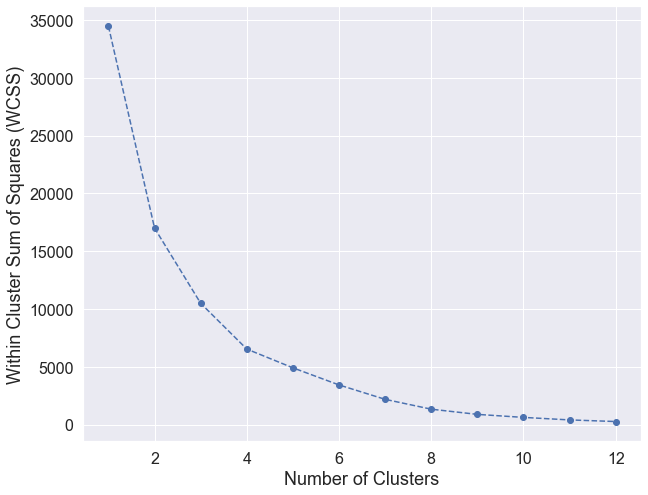

In [14]:
wcss = []
max_clusters = 13
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 13), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43221297362011124


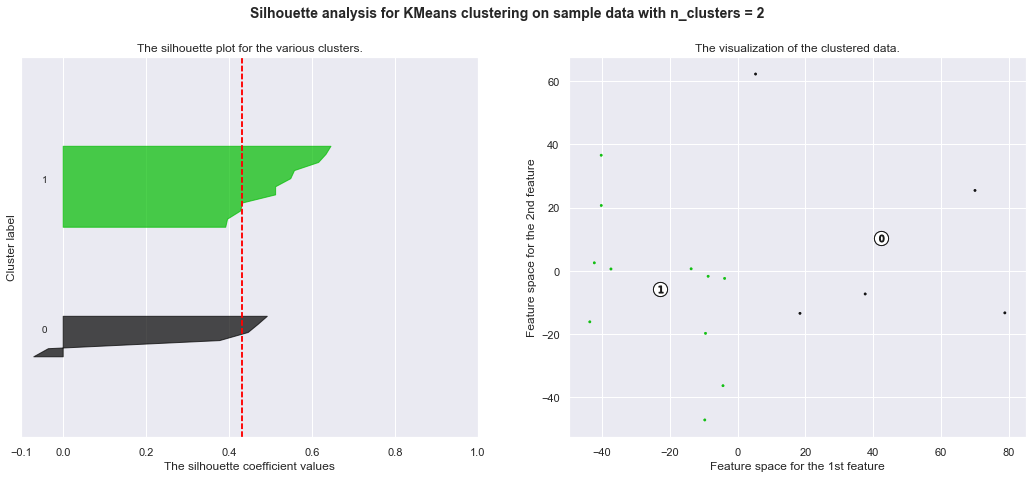

For n_clusters = 3 The average silhouette_score is : 0.39517162780398707


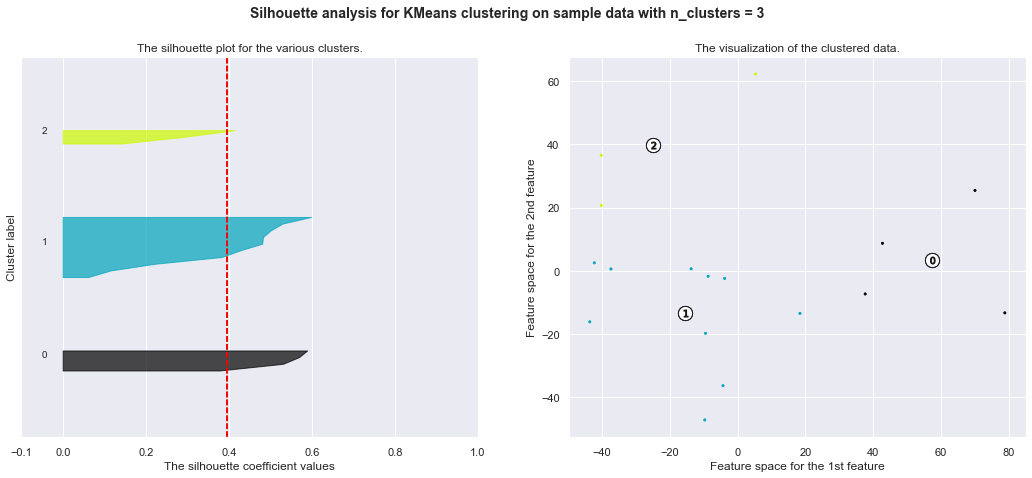

For n_clusters = 4 The average silhouette_score is : 0.3961149317617713


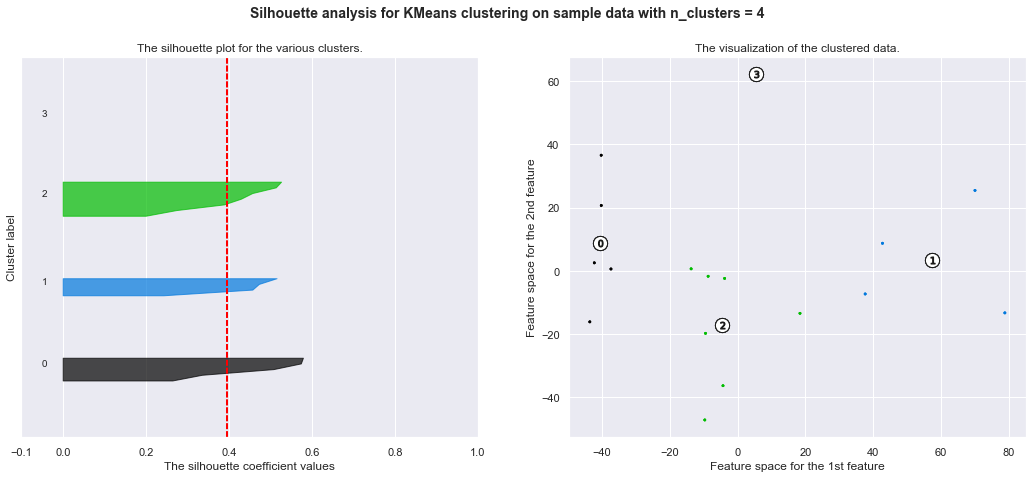

For n_clusters = 5 The average silhouette_score is : 0.40567648631698733


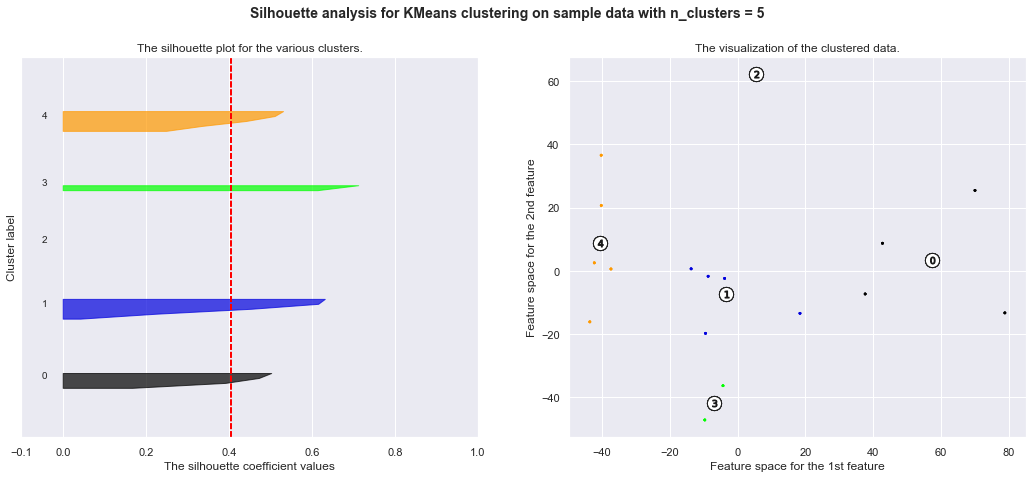

For n_clusters = 6 The average silhouette_score is : 0.37285608598050335


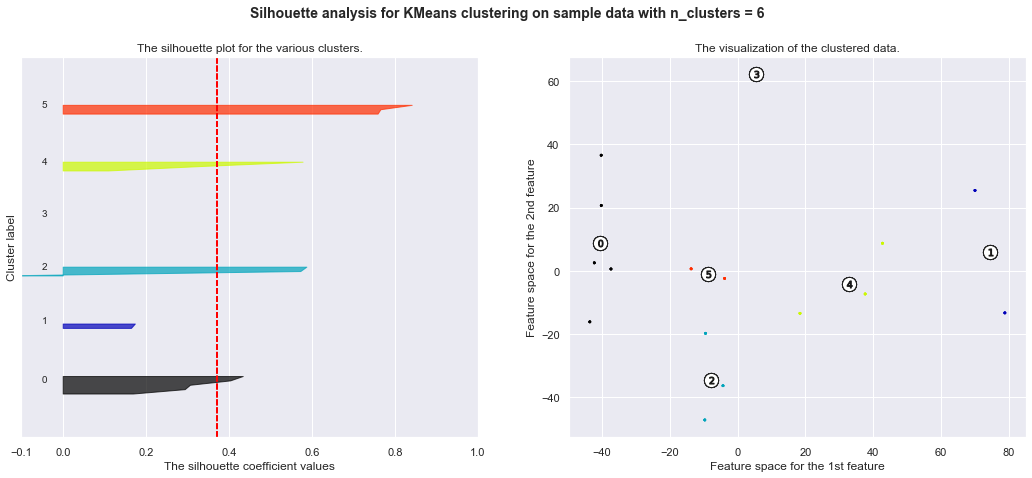

For n_clusters = 7 The average silhouette_score is : 0.4372225434845748


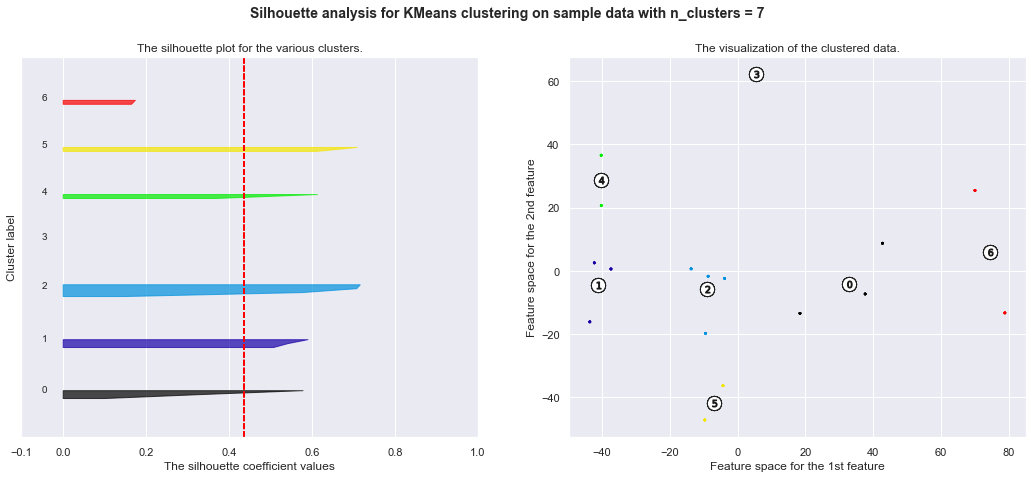

For n_clusters = 8 The average silhouette_score is : 0.40966255367510973


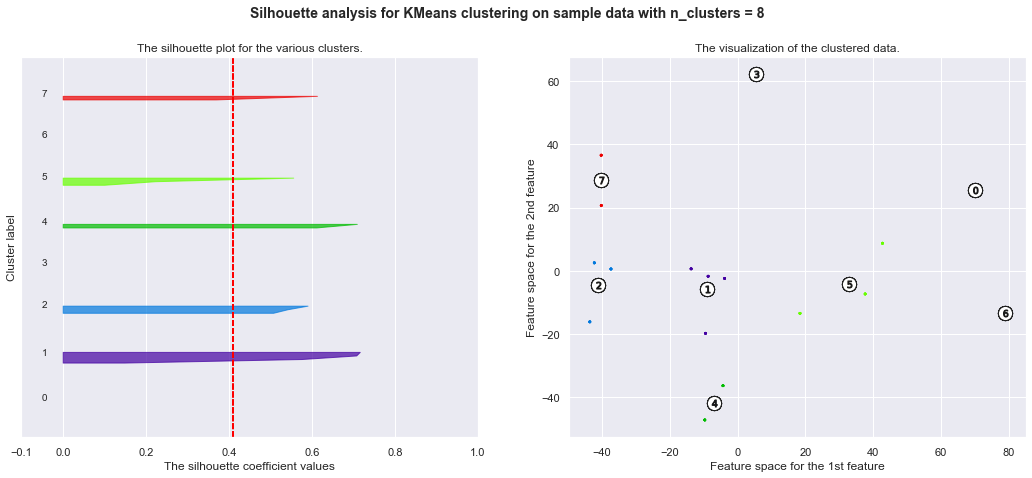

For n_clusters = 9 The average silhouette_score is : 0.3841858379225905


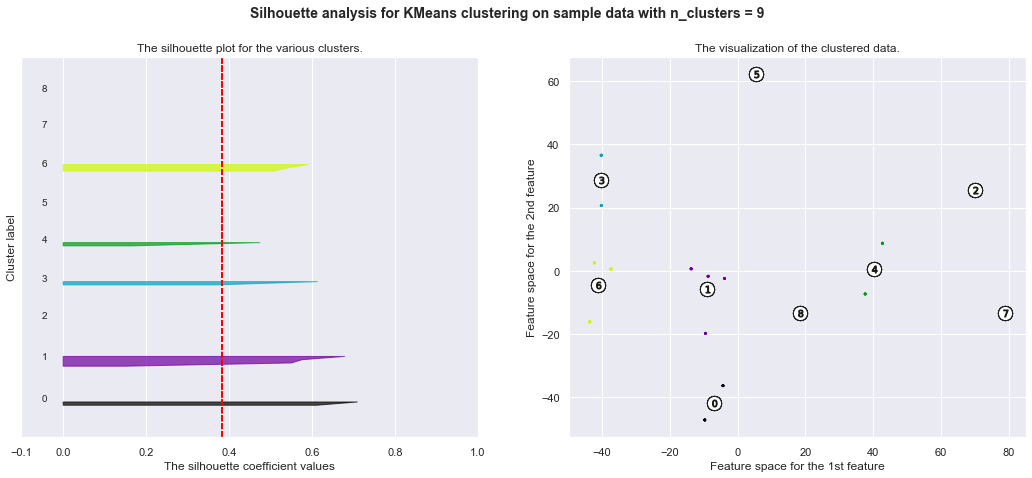

For n_clusters = 10 The average silhouette_score is : 0.35264252506271554


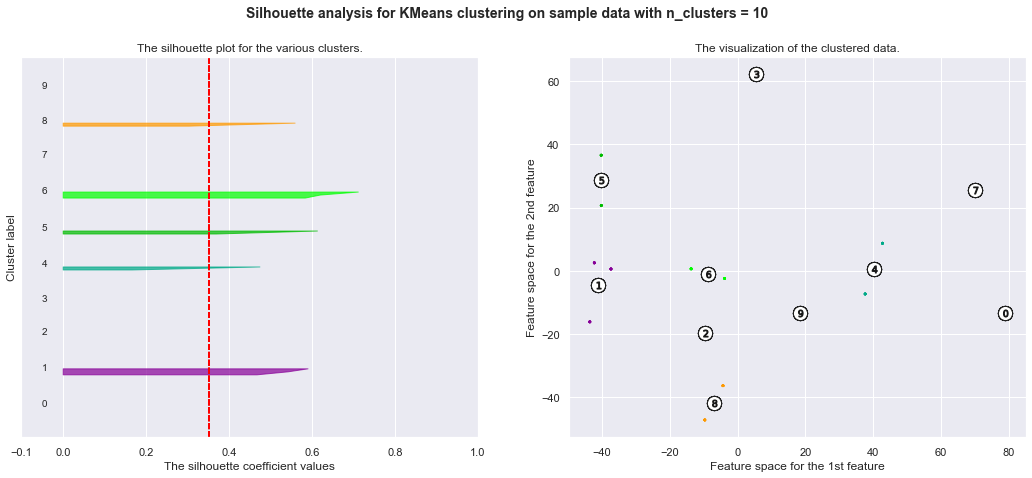

For n_clusters = 11 The average silhouette_score is : 0.32707150290024356


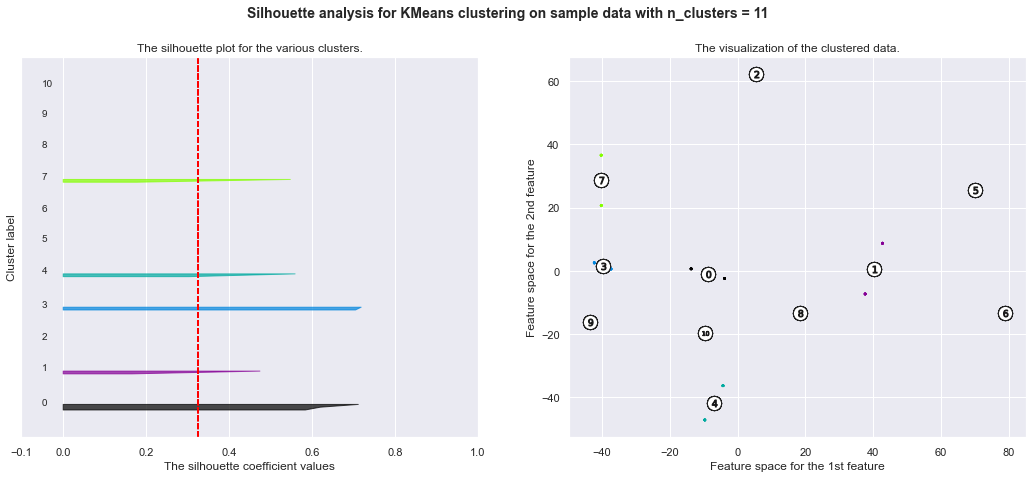

For n_clusters = 12 The average silhouette_score is : 0.28944325244766733


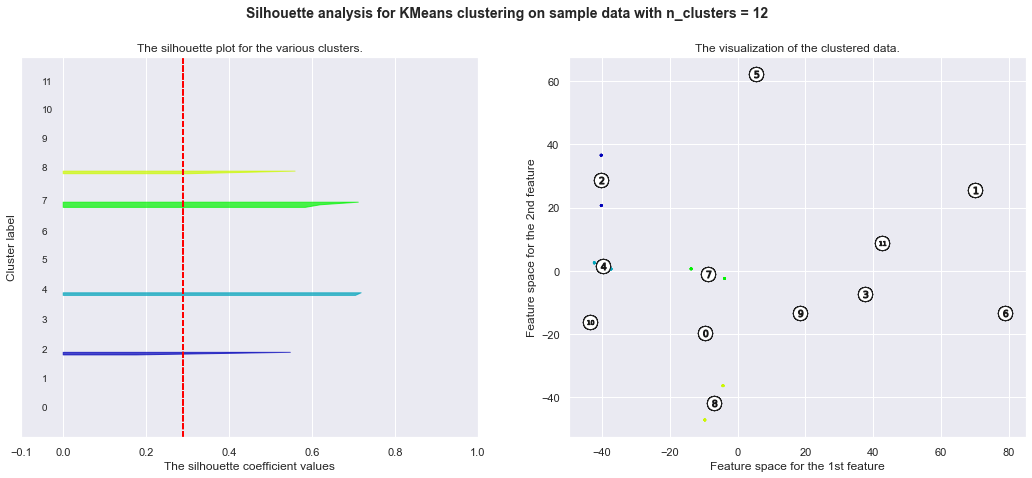

For n_clusters = 13 The average silhouette_score is : 0.246505013393854


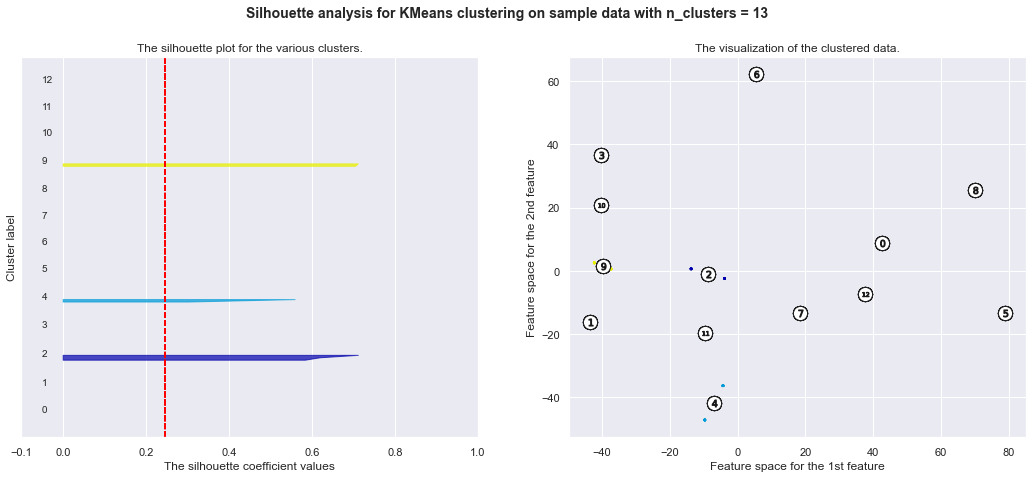

In [21]:
X_data = pca.transform(segmentation_std)
range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [46]:
p17_gap = optimalK(data_p, nrefs=3, maxClusters=13)
p17_gap

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.appen

(12,
     clusterCount       gap
 0            1.0 -1.876687
 1            2.0 -1.721351
 2            3.0 -1.655278
 3            4.0 -1.663399
 4            5.0 -1.605756
 5            6.0 -1.555776
 6            7.0 -1.550202
 7            8.0 -1.547174
 8            9.0 -1.470965
 9           10.0 -1.459260
 10          11.0 -1.438957
 11          12.0 -1.359611)

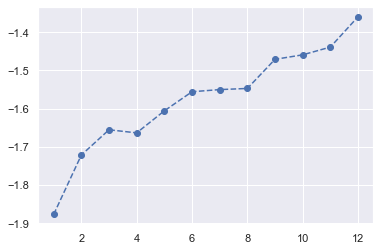

In [47]:
run_1_df = p17_gap[1]

clusterCount_1 = []
for count in run_1_df['clusterCount']:
    clusterCount_1.append(count)
    
gap_1 = []
for gap in run_1_df['gap']:
    gap_1.append(gap)
    
clusterCount_2 = clusterCount_1
gap_2 = gap_1

plt.plot(clusterCount_2, gap_2, linestyle='--', marker='o', color='b')

eval_env: 1


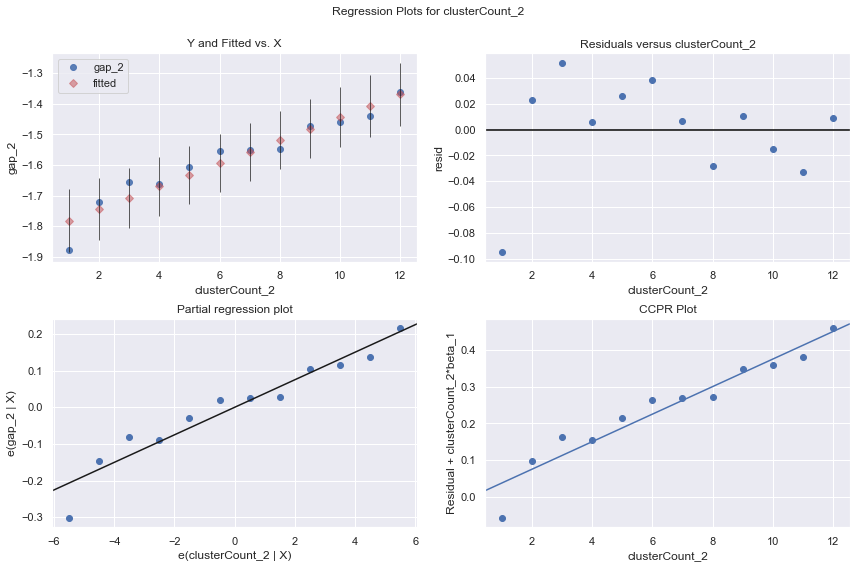

In [48]:
gap_stat_model_1 = ols('gap_2 ~ clusterCount_2', data=run_1_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'clusterCount_2', fig=gap_stat_fig_1)

eval_env: 1


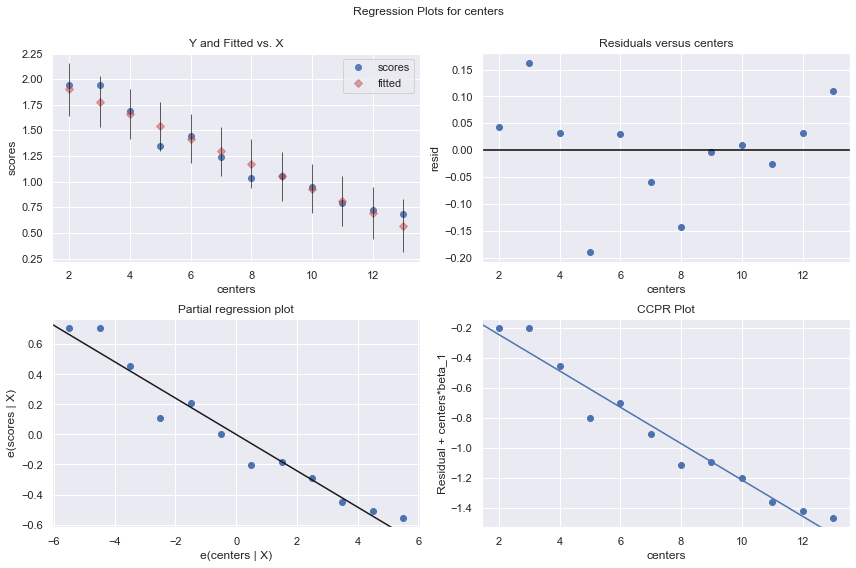

In [64]:
scores = []
centers = []
for n in range(2,14):
    s = get_kmeans_score(data_p, n)
    scores.append(s)
    centers.append(n)

column_names = ['scores', 'centers']
res_df = pd.DataFrame(columns = column_names)
res_df['scores'] = scores
res_df['centers'] = centers
gap_stat_model_1 = ols('scores ~ centers', data=res_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'centers', fig=gap_stat_fig_1)

# transcriptomics, n=17

In [7]:
%store -r ccle_8

In [8]:
ccle_8

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725,ids
cell_line,,,,,,,,,,,,,,,,,,,,,
COGAR359_SOFT_TISSUE,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,3.481557,...,0.879706,0.000000,0.014355,0.014355,0.432959,2.972693,0.056584,0.0,0.070389,COGAR359_SOFT_TISSUE
KKU213_BILIARY_TRACT,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,3.956986,...,0.000000,0.070389,0.000000,0.176323,0.411426,3.921246,0.028569,0.0,0.000000,KKU213_BILIARY_TRACT
SNU283_LARGE_INTESTINE,4.272023,0.189034,7.022923,2.555816,3.841973,0.000000,0.097611,4.888013,4.926474,3.526069,...,0.378512,0.176323,0.070389,0.163499,0.189034,3.054848,0.000000,0.0,0.000000,SNU283_LARGE_INTESTINE
DEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.056584,0.000000,6.093602,3.970854,3.731183,0.028569,6.092969,3.033863,3.422233,4.725741,...,0.000000,0.000000,0.014355,0.124328,1.304511,5.596041,0.124328,0.0,0.000000,DEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
LC1F_LUNG,4.411426,0.000000,6.412443,2.364572,4.275007,0.042644,0.201634,2.563158,6.104127,4.585563,...,0.000000,0.000000,0.028569,0.056584,0.839960,4.401903,0.042644,0.0,0.000000,LC1F_LUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U343_CENTRAL_NERVOUS_SYSTEM,4.018812,0.000000,6.700578,2.137504,2.531069,0.214125,2.998196,6.746447,4.444932,3.768714,...,0.000000,0.070389,0.000000,0.526069,0.411426,4.056584,0.070389,0.0,0.000000,U343_CENTRAL_NERVOUS_SYSTEM
MON_SOFT_TISSUE,5.994806,0.000000,6.238787,2.304511,4.000000,0.000000,0.150560,4.221877,3.273516,3.450221,...,0.000000,0.000000,0.042644,0.286881,0.925999,2.060047,0.000000,0.0,0.000000,MON_SOFT_TISSUE
TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.056584,0.000000,6.604071,3.264536,4.972693,0.411426,0.097611,0.704872,4.829850,5.178715,...,0.000000,0.000000,0.056584,0.298658,1.244887,4.553975,0.056584,0.0,0.000000,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE


In [10]:
p_omics_ids = ['OVCAR8', 'KURAMOCHI', 'A2780', 'OV90', 'RMUGS', 'OVSAHO', 'OV56', 'OVCAR3', 'JHOS2', 'HEYA8', 'IGROV1', 'FUOV1', 'SNU119', 'OVCAR4', 'TYKNU', 'COV362', 'CAOV3']
OC_indexes = []
for n in range(len(ccle_8['ids'])):
    for name in p_omics_ids:
        if name in ccle_8.iloc[n,53949]:
            OC_indexes.append(n)
OC_indexes

[196,
 200,
 219,
 290,
 351,
 363,
 393,
 397,
 400,
 514,
 515,
 517,
 567,
 616,
 652,
 686,
 687]

In [12]:
indexes_to_drop = []
for n in range(721):
    if n not in OC_indexes:
        indexes_to_drop.append(n)        
data_t65 = ccle_8.drop(ccle_8.index[indexes_to_drop])
data_t65 = data_t65.drop(['ids'], axis=1)
data_t65

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
cell_line,,,,,,,,,,,,,,,,,,,,,
FUOV1_OVARY,5.238405,0.632268,6.797662,1.959770,3.892391,0.028569,0.163499,5.104756,4.308157,4.209453,...,0.000000,0.298658,0.070389,0.028569,0.226509,0.807355,3.519793,0.000000,0.0,0.000000
TYKNU_OVARY,2.408712,0.000000,6.566511,2.121015,3.931683,0.014355,0.150560,5.375735,3.549669,4.390943,...,0.028569,0.000000,0.000000,0.014355,0.000000,0.310340,4.720826,0.000000,0.0,0.000000
CAOV3_OVARY,4.990501,0.000000,7.167017,1.761285,3.472488,0.084064,2.839960,6.684819,6.358080,5.019257,...,0.000000,0.000000,0.124328,0.042644,0.056584,0.378512,2.671293,0.000000,0.0,0.000000
JHOS2_OVARY,5.745775,0.000000,6.474274,2.608809,4.410748,0.014355,3.349082,5.348020,3.377124,3.670161,...,0.731183,0.000000,0.028569,0.042644,0.176323,0.378512,4.051372,0.000000,0.0,0.042644
OVSAHO_OVARY,4.804260,0.000000,7.200163,2.304511,4.106013,0.014355,2.689299,5.416502,3.221877,4.607034,...,0.000000,0.000000,0.176323,0.000000,0.310340,0.807355,4.301588,0.084064,0.0,0.000000
NIHOVCAR3_OVARY,5.183487,0.000000,7.497453,2.107688,4.217231,0.042644,0.903038,5.722193,4.676944,3.720278,...,0.042644,0.389567,0.263034,0.028569,0.516015,0.594549,4.873813,0.000000,0.0,0.000000
KURAMOCHI_OVARY,3.955127,0.214125,6.999324,2.629939,3.545968,0.111031,2.422233,5.167519,3.272023,4.244126,...,0.042644,0.000000,0.000000,0.124328,0.422233,0.839960,2.759156,0.000000,0.0,0.000000
COV362_OVARY,3.363171,0.042644,6.201438,1.847997,2.659925,0.000000,5.788686,5.019702,4.495056,4.177918,...,0.000000,0.000000,0.214125,0.000000,0.097611,0.739848,4.459432,0.056584,0.0,0.000000
OVCAR8_OVARY,3.361768,0.000000,6.816088,1.545968,3.423578,0.028569,0.097611,5.832890,4.480911,3.694880,...,0.028569,0.000000,0.137504,0.000000,0.028569,0.739848,4.761817,0.150560,0.0,0.000000


In [30]:
data_t17 = data_t65
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_t17)
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[ -6.61644346, -32.03277593],
       [-79.79449124, -53.4531485 ],
       [ 30.89185477, -12.08198921],
       [ 69.35338953,  20.01414673],
       [ 41.19519225,   7.56085996],
       [135.89922637,  -8.78048195],
       [ 78.00584015,  33.55640586],
       [ -6.53472817, -19.20726188],
       [-43.2990452 , -58.72365154],
       [ 96.62884684,   3.64381399],
       [-38.50588113, -21.31005061],
       [-73.01670763, -74.66560546],
       [  8.86955349,  23.69242315],
       [-35.40961167, -14.67083921],
       [-92.20652737, 213.60631137],
       [-22.04931433,  48.1718165 ],
       [-63.41115322, -55.31997326]])

Optimal number of clusters 4


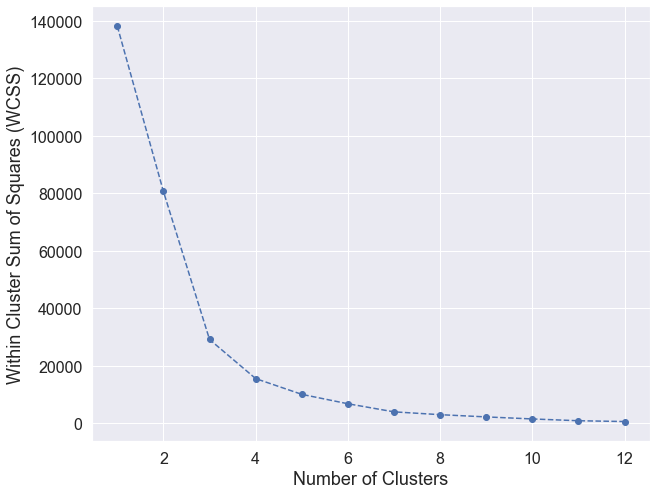

In [31]:
wcss = []
max_clusters = 13
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 13), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6058526616842439


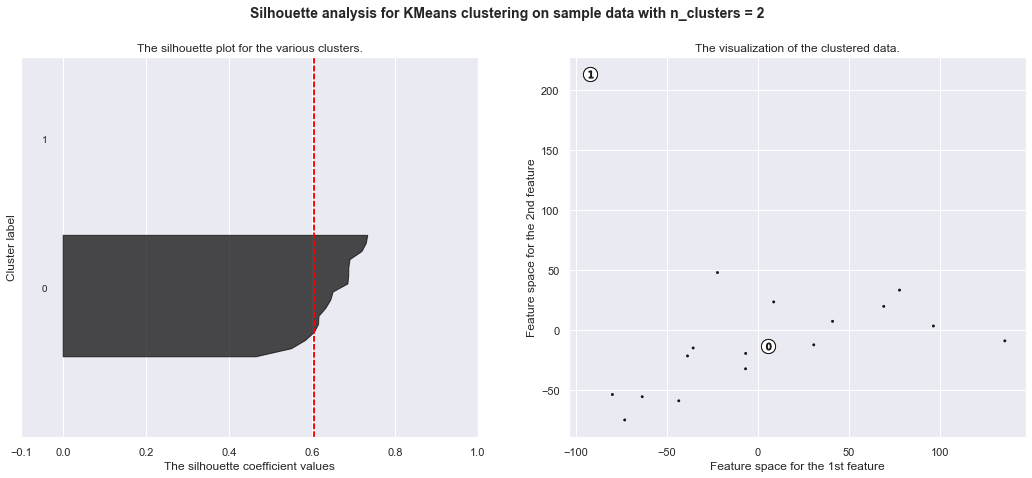

For n_clusters = 3 The average silhouette_score is : 0.46444666020674324


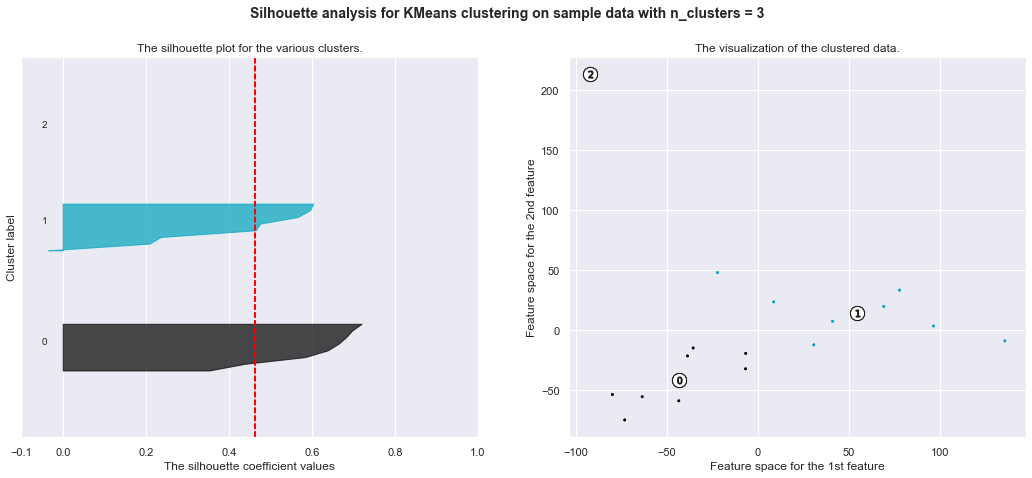

For n_clusters = 4 The average silhouette_score is : 0.4118406434245503


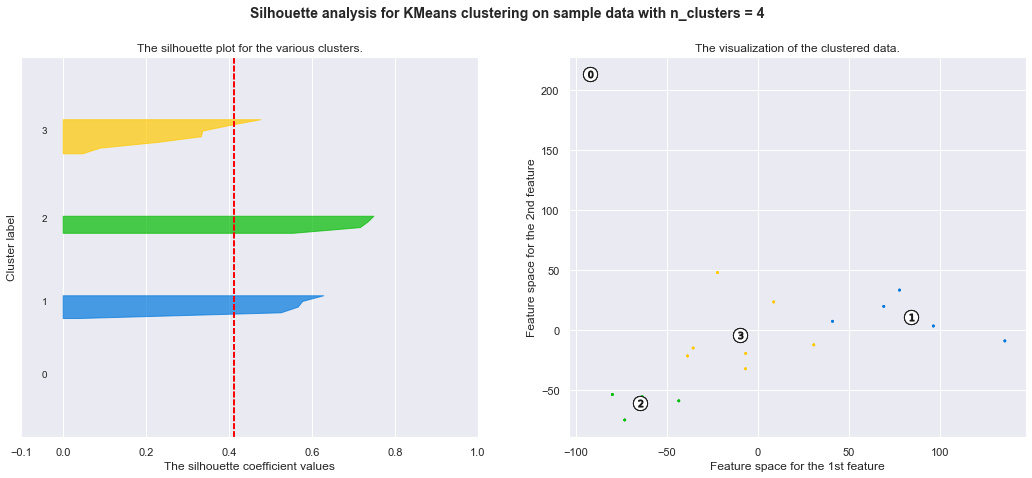

For n_clusters = 5 The average silhouette_score is : 0.41087895483713277


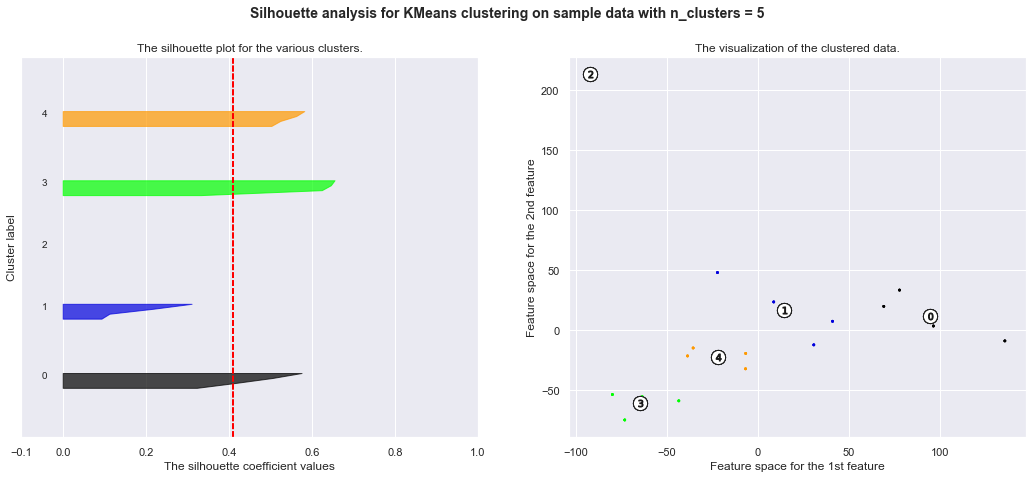

For n_clusters = 6 The average silhouette_score is : 0.411666293728435


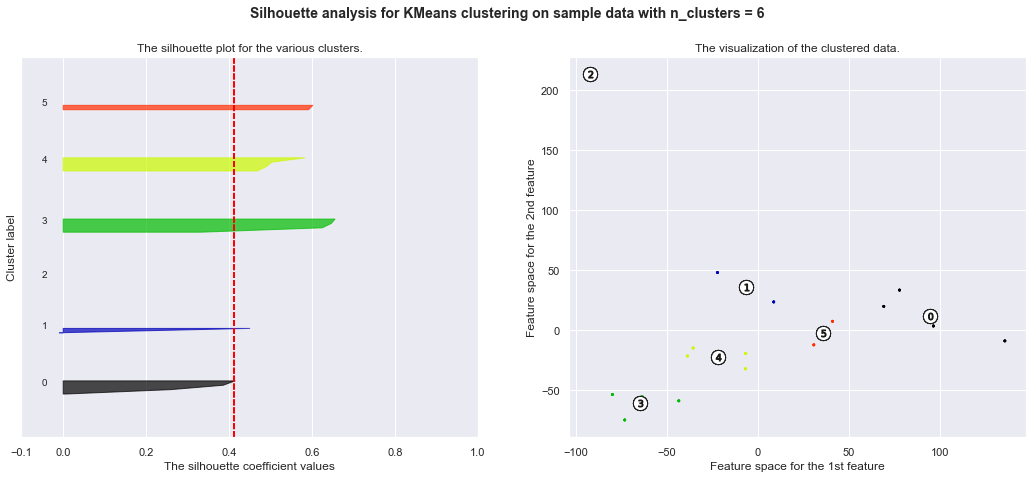

For n_clusters = 7 The average silhouette_score is : 0.4091145452051984


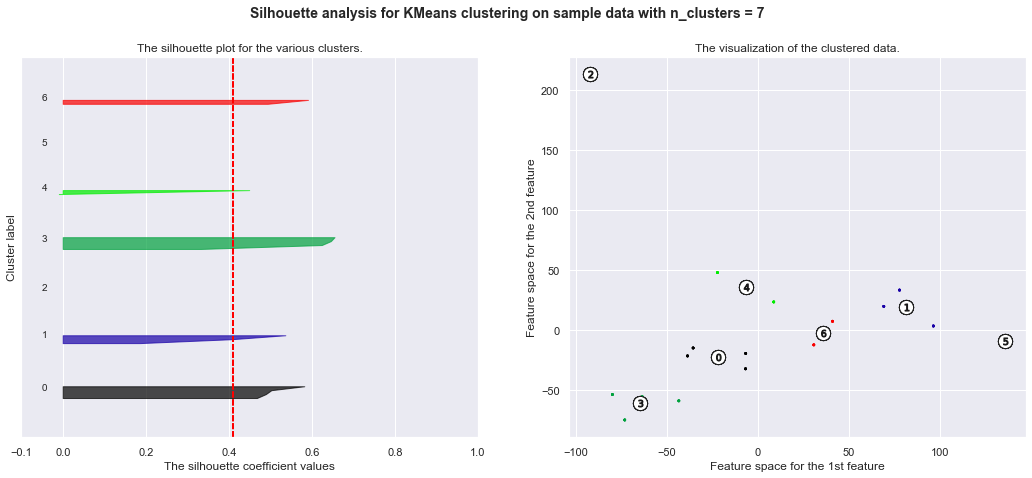

For n_clusters = 8 The average silhouette_score is : 0.42511124796850924


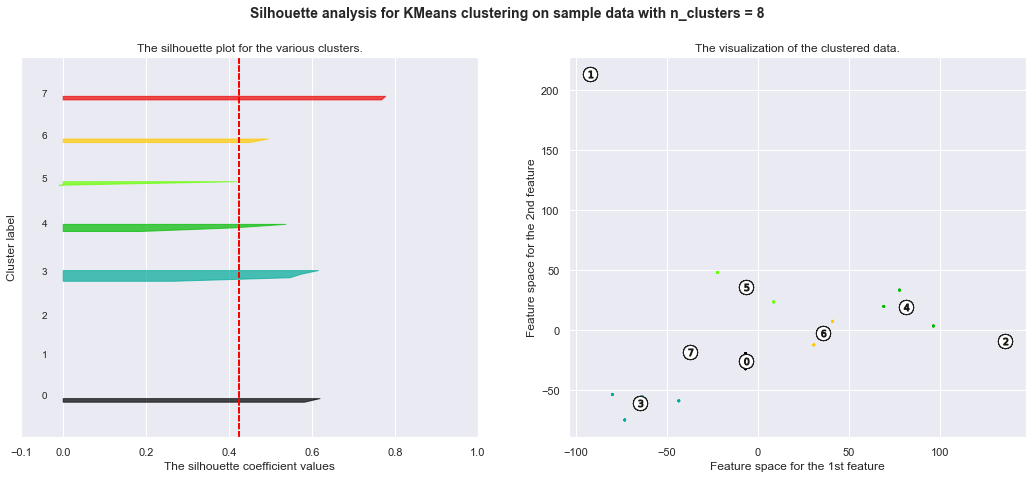

For n_clusters = 9 The average silhouette_score is : 0.39470617103491823


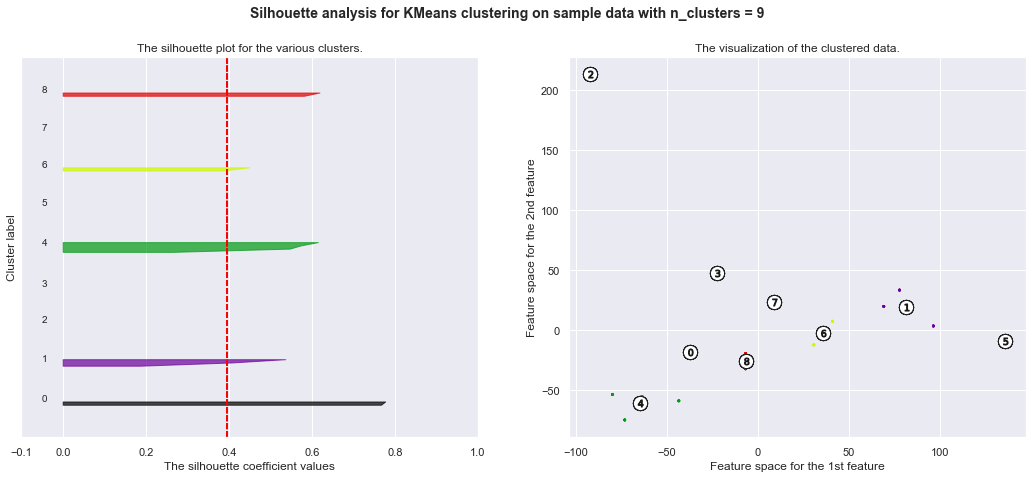

For n_clusters = 10 The average silhouette_score is : 0.38930975015112973


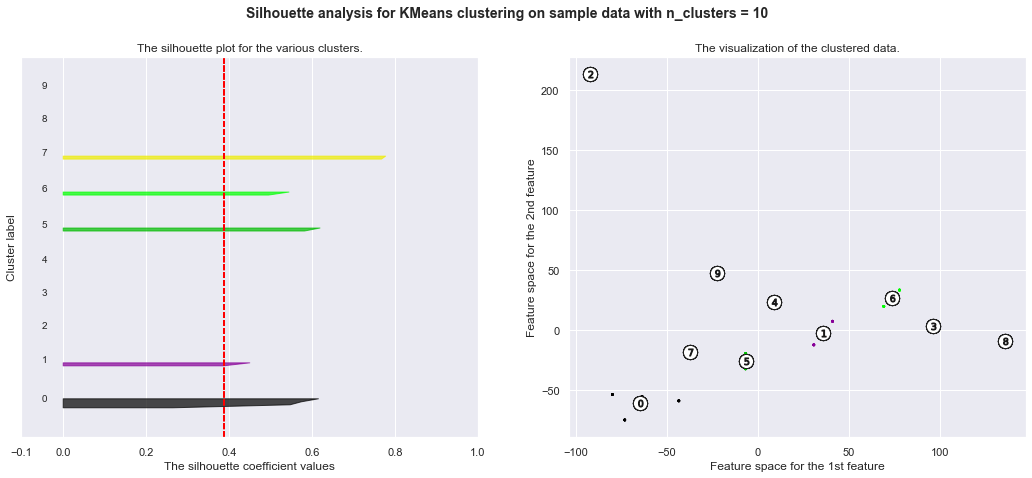

For n_clusters = 11 The average silhouette_score is : 0.3240287421536583


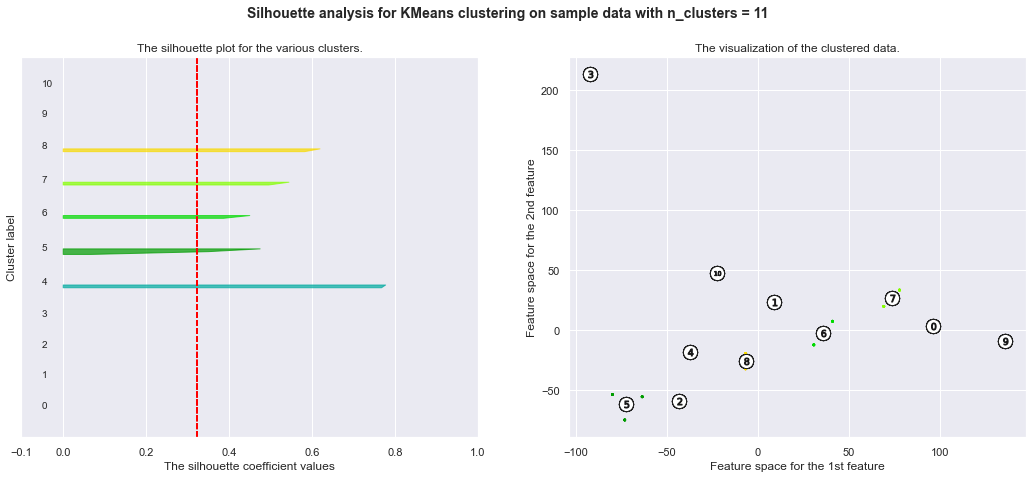

For n_clusters = 12 The average silhouette_score is : 0.29818997815442605


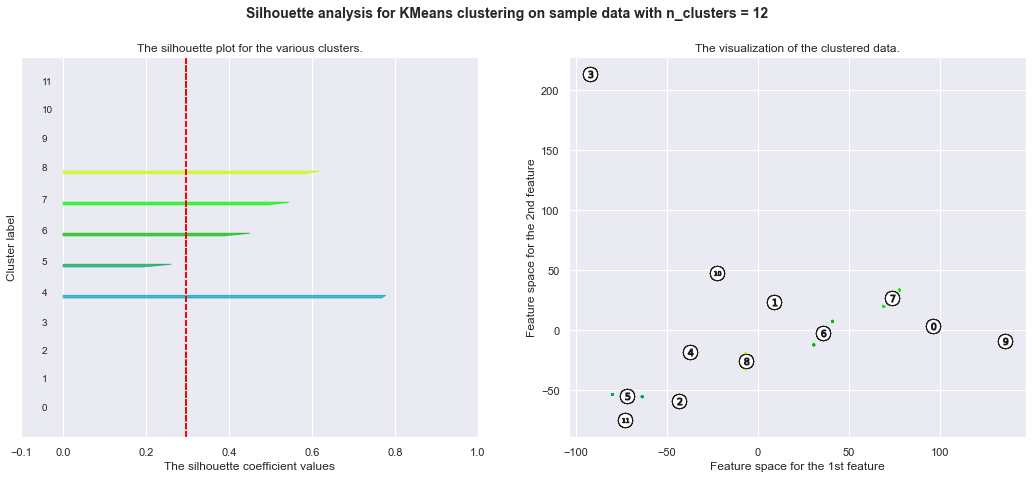

For n_clusters = 13 The average silhouette_score is : 0.2480558632220548


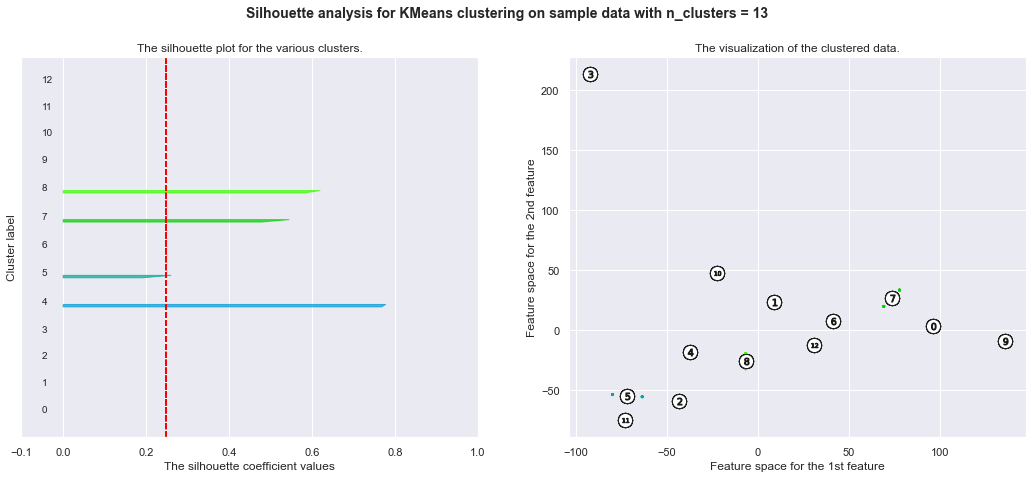

In [32]:
X_data = pca.transform(segmentation_std)
range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [49]:
t17_gap = optimalK(data_t17, nrefs=3, maxClusters=13)
t17_gap

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_1674/1057454647.py:37: FutureWarning: The frame.appen

(12,
     clusterCount       gap
 0            1.0 -1.388354
 1            2.0 -1.316574
 2            3.0 -1.284057
 3            4.0 -1.258128
 4            5.0 -1.219032
 5            6.0 -1.213751
 6            7.0 -1.141847
 7            8.0 -1.135856
 8            9.0 -1.078469
 9           10.0 -1.084428
 10          11.0 -1.047176
 11          12.0 -1.042387)

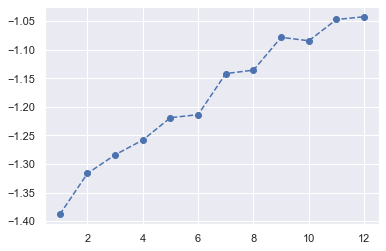

In [50]:
run_1_df = t17_gap[1]

clusterCount_1 = []
for count in run_1_df['clusterCount']:
    clusterCount_1.append(count)
    
gap_1 = []
for gap in run_1_df['gap']:
    gap_1.append(gap)
    
clusterCount_2 = clusterCount_1
gap_2 = gap_1

plt.plot(clusterCount_2, gap_2, linestyle='--', marker='o', color='b')

eval_env: 1


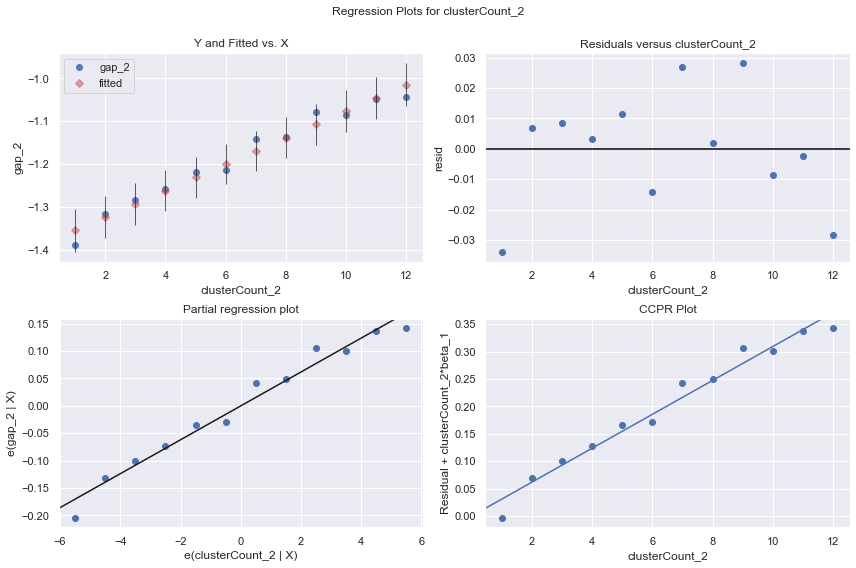

In [51]:
gap_stat_model_1 = ols('gap_2 ~ clusterCount_2', data=run_1_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'clusterCount_2', fig=gap_stat_fig_1)

eval_env: 1


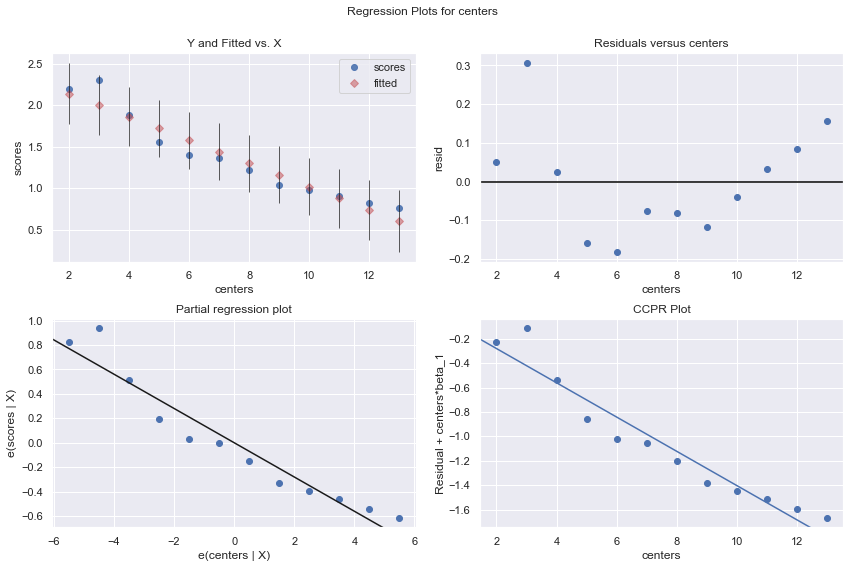

In [65]:
scores = []
centers = []
for n in range(2,14):
    s = get_kmeans_score(data_t17, n)
    scores.append(s)
    centers.append(n)

column_names = ['scores', 'centers']
res_df = pd.DataFrame(columns = column_names)
res_df['scores'] = scores
res_df['centers'] = centers
gap_stat_model_1 = ols('scores ~ centers', data=res_df).fit()
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'centers', fig=gap_stat_fig_1)